In [86]:
# imports
from IPython.display import Image, display
from bokeh.plotting import figure, show, output_file
from bokeh.io import push_notebook, show, output_notebook
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

<b>Part 0:</b>

The following plot and caption come from Blondin, S. & Tonry, J. L. 2007. ApJ, 666, 1024. This paper introduces the Supernova Identification code (SNID) and discusses the methods it uses. It is an important plot because it shows lots of details about how data is treated, and also why it is in principle possible to identify the type and phase of a supernova from its spectrum.

In particular, the figure shows that the spectrum of a Type Ia supernova undergoes subtle changes with time. I think the figure does a good job of demonstrating this, because one can see the spectrum evolve over time just by looking. Another thing that is done well in the figure is the use of two horizontal axis labels, which shows how the logarithmic wavelength scaling is accomplished.

I will discuss ways this figure could be improved below the figure itself.

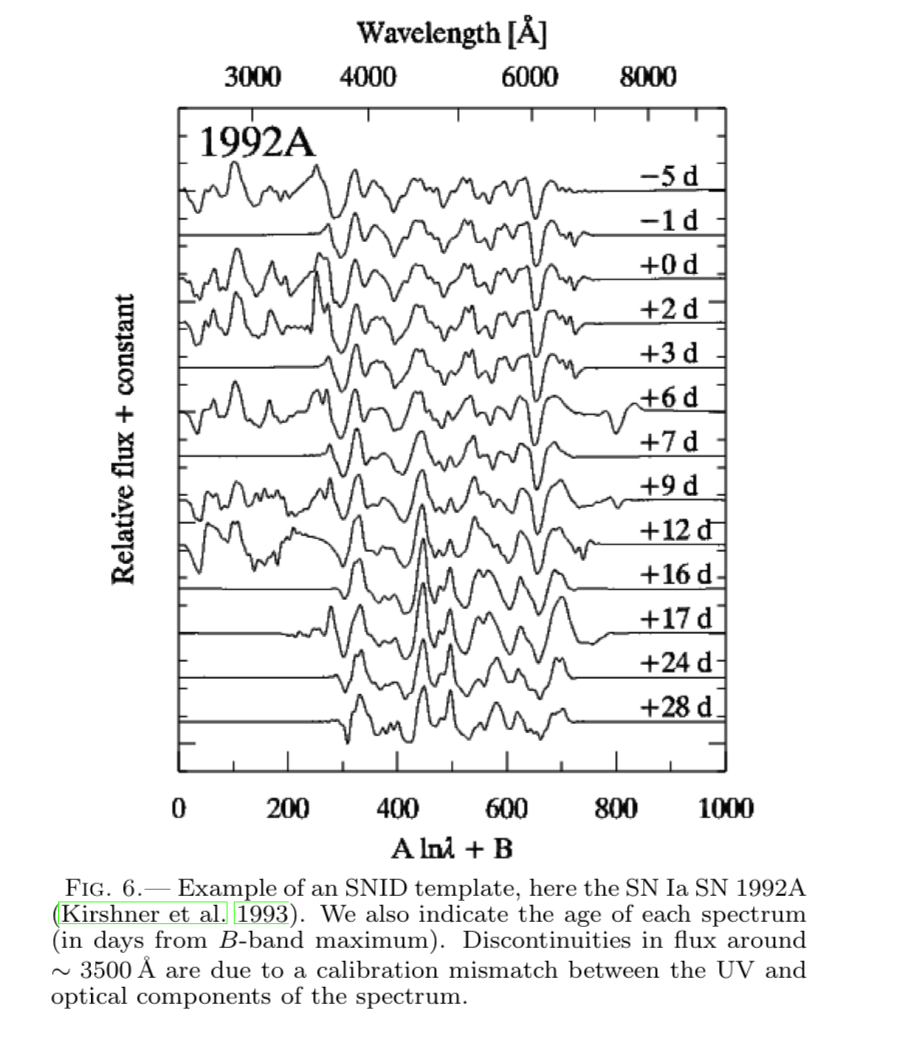

In [100]:
display(Image(filename='hw_2_data/snid.png'))

I see two immediate ways the figure could be improved.

First, vertical grid lines could be used to show that not only do the spectral features change in relative flux, but the wavelengths at which the features occur can shift slowly with time as well.

Second, different colors (or at the very least linestyles) could be used to make it more easy to see which spectrum belongs with which age.

One thing I thought was unnecessary in telling the intended story was including the UV spectra (low wavelength). There are plenty of features with which one can see the evolution between 3700 and 6500 angstroms, so having a few spectra with features at lower wavelengths doesn't make the case any stronger. Furthermore, I see no utility in having them because not all other spectra have coverage at these low wavelengths so one couldn't compare even if they wanted to. By removing them, one could make the figure slightly smaller and also trim off the last sentence in the caption without weakening the story in any way.

<b>Part 1:</b>

Although the following plots have not been published, they (or something showing similar information) likely will be in the future. They illustrate two distinct methods for sampling data from a supernova spectrum (in log-wavelength space), which are referred to as "mid" or "max_mag". In both schemes the spectrum is split into $n$ regions, separated by the vertical dashed lines. With the "mid" scheme, the flux value at the (logarithmic) wavelength midpoint is selected (denoted by a red star) in each region. With the "max_mag" scheme, the flux value that has the largest distance from zero is selected in each region (again denoted by a red star). The plots are shown below:

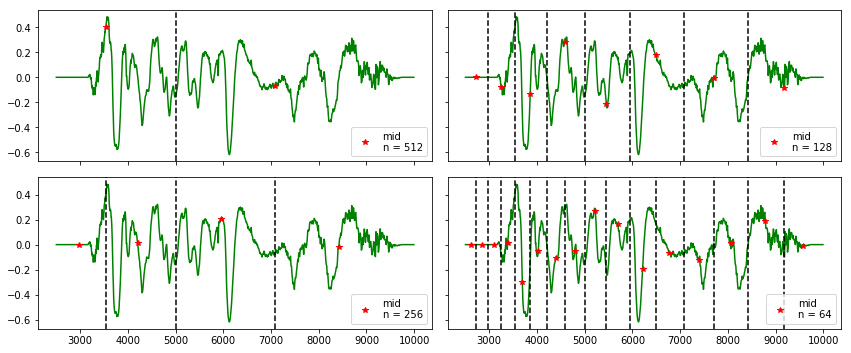

------------------------------------------------------------------------------------------------------


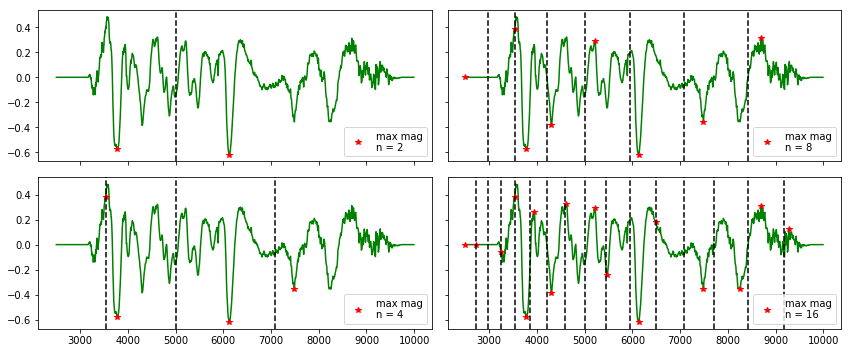

In [93]:
display(Image(filename='hw_2_data/mid.png'))
print('------------------------------------------------------------------------------------------------------')
display(Image(filename='hw_2_data/max_mag.png'))

In the following plot created with bokeh, all of the above 8 plots can be reproduced interactively. The user simply selects the sampling scheme and then choose the value of $n$.

In [97]:
# load spectrum file
spec = np.genfromtxt('hw_2_data/SN1997y-proc.txt')
wavp = spec[:,0]
specp = spec[:,1]

# define helper function
def feat_vals(spec, n_reg = 8, return_idx = False, wav = None):
    '''break into n_reg regions and extract min/max'''
    
    # split the spectrum into n_reg regions:
    sspec = np.split(spec, n_reg)
    
    # find the location of maximum magnitude point in each regions
    mmp_locs = np.argmax(np.abs(sspec),axis=1)
    
    # return array of maximum magnitue point for each region
    if return_idx is False:
        return np.array([sspec[idx][mmp] for idx, mmp in enumerate(mmp_locs)])
    else:
        swav = np.split(wav, n_reg)
        return np.array([swav[idx][mmp] for idx, mmp in enumerate(mmp_locs)]), \
                np.array([sspec[idx][mmp] for idx, mmp in enumerate(mmp_locs)])

output_notebook()

# make bokeh plot and add the spectrum
ylim = (-0.7,0.7)
p = figure(title="Spectrum of SN1997Y with Different Sampling Schemes", plot_height=300, 
           plot_width=600, y_range=ylim)
r = p.line(wavp, specp, color='green', line_width=2)

# instantiate placeholders for markers and vertical divider lines
dots = p.asterisk([],[],color='red',size=12)
vlines = p.vbar([],None,ylim[1],bottom=ylim[0],color='black',line_dash='dashed')

# define update function
def update_fn(method, n=2):
   
    # find the wavelength and flux values at the (logarithmic) midpoints in wavelength
    #     space of each region
    if method == 'mid':
        wav_vals = wavp[int(len(specp)/(2*n))::int(len(specp)/n)]
        vals = specp[int(len(specp)/(2*n))::int(len(specp)/n)]

    # find the wavelengths and values of the maximum magnitude point in each region
    elif method == 'max_mag':
        wav_vals, vals = feat_vals(specp, n_reg = n, return_idx = True, wav = wavp)
    
    # in the cell below there is a warning that these are not the same length
    #    the assertion here is to ensure that they in fact are the same length
    assert len(wav_vals) == len(vals)
    
    # update with the appropriate vertical lines and flux markers
    dots.data_source.data['x'] = wav_vals
    dots.data_source.data['y'] = vals
    vlines.data_source.data['x'] = wavp[int(len(wavp)/n)::int(len(wavp)/n)]
    
    push_notebook()

show(p, notebook_handle=True)

Loading BokehJS ...

In [98]:
interact(update_fn, method=["mid","max_mag"], n=[2,4,8,16])

interactive(children=(Dropdown(description='method', options=('mid', 'max_mag'), value='mid'), Dropdown(description='n', options=(2, 4, 8, 16), value=2), Output()), _dom_classes=('widget-interact',))

<function __main__.update_fn>

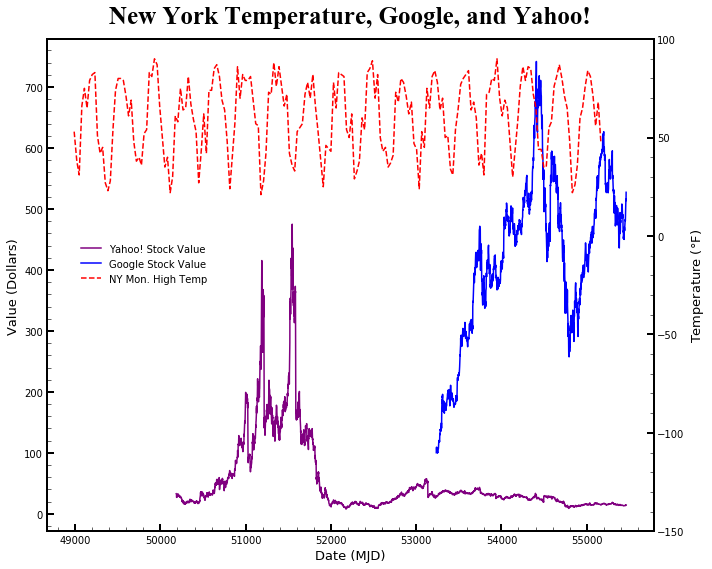

In [101]:
# part 2

# read in data
ny = np.genfromtxt('hw_2_data/ny_temps.txt', names=['MJD','max_temp'], skip_header=1)
yh = np.genfromtxt('hw_2_data/yahoo_data.txt', names=['MJD','stock_val'], skip_header=1)
goog = np.genfromtxt('hw_2_data/google_data.txt', names=['MJD','stock_val'], skip_header=1)

# create figure and axis for the plot
fig, ax = plt.subplots(1,1, figsize=(10,8))

# create second axis for the temperature data to sit atop the primary axis
axT = ax.twinx()

# plot data
ax.plot(yh['MJD'], yh['stock_val'], 'purple', label = 'Yahoo! Stock Value')
ax.plot(goog['MJD'], goog['stock_val'], 'blue', label = 'Google Stock Value')
axT.plot(ny['MJD'], ny['max_temp'], 'r--', label = 'NY Mon. High Temp')

# set axis limits
axT.set_ylim((-150,100))

# adjust axis ticks
ax.tick_params(direction='in', which='both')
ax.tick_params(which='major', width=2, length=7)
ax.tick_params(which='minor', length=4)
ax.xaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(20))
axT.tick_params(direction='in', which='both')
axT.tick_params(which='major', width=2, length=7)
axT.tick_params(which='minor', length=4)
axT.yaxis.set_minor_locator(MultipleLocator(10))

# make axis box a thicker line width
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

# add labels
ttl = ax.title
ttl.set_position((0.5,1.02))
ax.set_title('New York Temperature, Google, and Yahoo!')
ax.set_xlabel('Date (MJD)')
ax.set_ylabel('Value (Dollars)')
axT.set_ylabel(r'Temperature ($\degree$F)')

# adjust font sizes and styles
ax.title.set_fontsize(25)
ax.title.set_fontweight('heavy')
ax.title.set_fontname('Times New Roman')
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)
axT.yaxis.label.set_fontsize(13)

# add legend
fig.legend(frameon=False, bbox_to_anchor=(0.30,0.58))

# tight layout
plt.tight_layout()